In [ ]:
# import driver from google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Extract the zip file
import zipfile

zip_file_path = "/content/drive/MyDrive/Cap_v1/Food-101-Annotated-V3.zip"  # Replace with actual path
extract_to_path = "/content/drive/MyDrive/Cap_v1/v3"  # Replace with desired extraction folder

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction completed successfully!")

Extraction completed successfully!


In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:

#Reading the csv file  used car data.csv
df=pd.read_csv('/content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv')
df.head()

,image,class_name,x_center,y_center,width,height
0,1199754.jpg,french_fries,0.509375,0.522656,0.720313,0.771875
1,1232631.jpg,nachos,0.178125,0.717969,0.351562,0.439063
2,1232631.jpg,nachos,0.522656,0.511719,0.932813,0.954688
3,2616112.jpg,nachos,0.165625,0.526563,0.214844,0.465625
4,2616112.jpg,nachos,0.394531,0.482812,0.171875,0.379688


In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import json

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Cap_v1/Food-101-Annotated/'
annotation_csv_path = '/content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv'

try:
    df_annotations = pd.read_csv(annotation_csv_path)
    print(f"Successfully loaded annotation file: {annotation_csv_path}")
    print(f"Annotation DataFrame shape: {df_annotations.shape}")
    print("Annotation DataFrame head:")
    print(df_annotations.head())

    # --- ADD THIS LINE TO DEBUG THE COLUMN NAMES ---
    print("\nColumns available in the DataFrame:", df_annotations.columns.tolist())
    # ------------------------------------------------

except FileNotFoundError:
    print(f"Error: Annotation CSV file not found at {annotation_csv_path}")
    exit()

# The rest of your code follows...
# ... (rest of your code from the previous working solution)

Successfully loaded annotation file: /content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv
Annotation DataFrame shape: (1090, 6)
Annotation DataFrame head:
         image    class_name  x_center  y_center     width    height
0  1199754.jpg  french_fries  0.509375  0.522656  0.720313  0.771875
1  1232631.jpg        nachos  0.178125  0.717969  0.351562  0.439063
2  1232631.jpg        nachos  0.522656  0.511719  0.932813  0.954688
3  2616112.jpg        nachos  0.165625  0.526563  0.214844  0.465625
4  2616112.jpg        nachos  0.394531  0.482812  0.171875  0.379688

Columns available in the DataFrame: ['image', 'class_name', 'x_center', 'y_center', 'width', 'height']


In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import numpy as np
import json

# --- VERY IMPORTANT: GOOGLE DRIVE MOUNTING (IF IN COLAB) ---
# Uncomment and run this cell first if you are in Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# -------------------------------------------------------------

# Define the ROOT path to your image dataset
# This should be the folder that DIRECTLY contains subfolders like 'pizza', 'burger', etc.
# Based on your CSV structure, it seems your images are in:
# dataset_path / class_name / image (e.g., /Food-101-Annotated/pizza/image_0001.jpg)
dataset_path = '/content/drive/MyDrive/Cap_v1/Food-101-Annotated/' # <--- **VERIFY THIS PATH!**
# Make sure 'Cap_v1' is correct and not 'Cap_1' as seen in earlier FileNotFoundError.

# Path to the annotation CSV file
# This MUST be the EXACT path to your CSV file. Use the Colab "Copy path" feature if unsure.
annotation_csv_path = '/content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv' # <--- **PASTE YOUR EXACT COPIED PATH HERE!**
# Again, ensure 'Cap_v1' is correct here.

try:
    df_annotations = pd.read_csv(annotation_csv_path)

    # Strip whitespace from column names to handle potential issues with extra spaces
    df_annotations.columns = df_annotations.columns.str.strip()

    print(f"Successfully loaded annotation file: {annotation_csv_path}")
    print(f"Annotation DataFrame shape: {df_annotations.shape}")
    print("Annotation DataFrame head:")
    print(df_annotations.head())

    # --- THIS IS THE KEY OUTPUT YOU NEED TO SHARE IF YOU STILL GET KeyError ---
    print("\n---------------------------------------------------------")
    print("!!! ACTUAL COLUMNS IN YOUR DATAFRAME (AFTER STRIPPING) !!!")
    actual_columns = df_annotations.columns.tolist()
    print(actual_columns) # THIS WILL SHOW YOU THE EXACT NAMES PANDAS FOUND
    print("---------------------------------------------------------\n")
    # --- END OF KEY DEBUGGING STEP ---

    # --- SET THESE VARIABLES BASED ON THE 'ACTUAL COLUMNS' OUTPUT FROM ABOVE ---
    # Based on your latest error message, the columns are:
    # ['image', 'class_name', 'x_center', 'y_center', 'width', 'height']
    ACTUAL_CLASS_COLUMN_NAME = 'class_name'     # <--- FIXED: Using 'class_name'
    ACTUAL_FILENAME_COLUMN_NAME = 'image'      # <--- FIXED: Using 'image'

    if ACTUAL_CLASS_COLUMN_NAME not in df_annotations.columns:
        print(f"Error: The class column '{ACTUAL_CLASS_COLUMN_NAME}' was not found in the CSV.")
        print(f"Available columns: {actual_columns}")
        print(f"Please check your CSV file's header and update 'ACTUAL_CLASS_COLUMN_NAME' in the code.")
        exit(f"Exiting due to missing column: '{ACTUAL_CLASS_COLUMN_NAME}'.")

    if ACTUAL_FILENAME_COLUMN_NAME not in df_annotations.columns:
        print(f"Error: The filename column '{ACTUAL_FILENAME_COLUMN_NAME}' was not found in the CSV.")
        print(f"Available columns: {actual_columns}")
        print(f"Please check your CSV file's header and update 'ACTUAL_FILENAME_COLUMN_NAME' in the code.")
        exit(f"Exiting due to missing column: '{ACTUAL_FILENAME_COLUMN_NAME}'.")


except FileNotFoundError:
    print(f"Error: Annotation CSV file not found at {annotation_csv_path}")
    print(f"Please double-check the path and ensure Google Drive is mounted if in Colab.")
    exit("Exiting due to FileNotFoundError.")

# Now, use ACTUAL_CLASS_COLUMN_NAME and ACTUAL_FILENAME_COLUMN_NAME consistently
all_food_classes_from_csv = df_annotations[ACTUAL_CLASS_COLUMN_NAME].unique().tolist()
print("\nAll Food Classes found in CSV:", all_food_classes_from_csv)

if len(all_food_classes_from_csv) >= 10:
    selected_food_classes = random.sample(all_food_classes_from_csv, 10)
else:
    print(f"Warning: Only {len(all_food_classes_from_csv)} classes available in CSV. Selecting all of them.")
    selected_food_classes = all_food_classes_from_csv

print("\nSelected Food Classes for Processing:", selected_food_classes)
num_images_to_process_per_class = 50

train_image_paths = {}
test_image_paths = {}

for food_class in selected_food_classes:
    train_image_paths[food_class] = []
    test_image_paths[food_class] = []

    # Filter annotations for the current food class using the actual class column name
    class_annotations = df_annotations[df_annotations[ACTUAL_CLASS_COLUMN_NAME] == food_class]

    # Get the image file names for this class using the actual filename column name
    class_image_filenames = class_annotations[ACTUAL_FILENAME_COLUMN_NAME].tolist()

    full_image_paths_for_class = []
    for fname in class_image_filenames:
        # Construct the full path to the image.
        # Assuming images are structured as: dataset_path / class_name / image_filename
        # Example: '/content/drive/MyDrive/Cap_v1/Food-101-Annotated/pizza/image_0001.jpg'
        img_full_path = os.path.join(dataset_path, food_class, fname)
        if os.path.isfile(img_full_path):
            full_image_paths_for_class.append(img_full_path)
        else:
            # You can uncomment this if you want to see warnings for missing individual image files
            # print(f"Warning: Image file not found on disk: {img_full_path}")
            pass

    if num_images_to_process_per_class > 0:
        images_for_split = random.sample(
            full_image_paths_for_class,
            min(num_images_to_process_per_class, len(full_image_paths_for_class))
        )
    else:
        images_for_split = full_image_paths_for_class

    random.shuffle(images_for_split)
    split_point = int(len(images_for_split) * 0.70)

    train_image_paths[food_class] = images_for_split[:split_point]
    test_image_paths[food_class] = images_for_split[split_point:]

print("\n--- Image Path Summary ---")
total_train_images = 0
print("Training image paths for selected classes:")
for cls, paths in train_image_paths.items():
    print(f"{cls}: {len(paths)} images")
    total_train_images += len(paths)
print(f"Total training images: {total_train_images}")


total_test_images = 0
print("\nTesting image paths for selected classes:")
for cls, paths in test_image_paths.items():
    print(f"{cls}: {len(paths)} images")
    total_test_images += len(paths)
print(f"Total testing images: {total_test_images}")

print("\nExample paths for a class (e.g., first selected class):")
if selected_food_classes:
    example_class = selected_food_classes[0]
    print(f"  Training paths for {example_class} (first 3):")
    for p in train_image_paths[example_class][:3]:
        print(f"    {p}")
    print(f"  Testing paths for {example_class} (first 3):")
    for p in test_image_paths[example_class][:3]:
        print(f"    {p}")

print("\n--- Loading Example Images ---")

target_size = (128, 128)

print("\nLoading example training images:")
num_examples_to_load = 5
loaded_train_images = []
loaded_train_labels = []

for i, food_class in enumerate(selected_food_classes):
    if len(loaded_train_images) >= num_examples_to_load:
        break

    if food_class not in train_image_paths:
        print(f"Warning: No training paths found for class {food_class} in train_image_paths dictionary.")
        continue

    for img_path in train_image_paths[food_class]:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img_array = np.array(img)
                loaded_train_images.append(img_array)
                loaded_train_labels.append(food_class)
                print(f"  Loaded training image: {img_path} (Shape: {img_array.shape})")
                if len(loaded_train_images) >= num_examples_to_load:
                    break
        except Exception as e:
            print(f"  Error loading training image {img_path}: {e}") # f-string syntax error fixed here

print("\nLoading example testing images:")
loaded_test_images = []
loaded_test_labels = []

for i, food_class in enumerate(selected_food_classes):
    if len(loaded_test_images) >= num_examples_to_load:
        break

    if food_class not in test_image_paths:
        print(f"Warning: No testing paths found for class {food_class} in test_image_paths dictionary.")
        continue

    for img_path in test_image_paths[food_class]:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img_array = np.array(img)
                loaded_test_images.append(img_array)
                loaded_test_labels.append(food_class)
                print(f"  Loaded testing image: {img_path} (Shape: {img_array.shape})")
                if len(loaded_test_images) >= num_examples_to_load:
                    break
        except Exception as e:
            print(f"  Error loading testing image {img_path}: {e}")

print(f"\nTotal example training images loaded: {len(loaded_train_images)}")
if loaded_train_images:
    print(f"Shape of first loaded training image: {loaded_train_images[0].shape}")
    print(f"Label of first loaded training image: {loaded_train_labels[0]}")

print(f"\nTotal example testing images loaded: {len(loaded_test_images)}")
if loaded_test_images:
    print(f"Shape of first loaded testing image: {loaded_test_images[0].shape}")
    print(f"Label of first loaded testing image: {loaded_test_labels[0]}")

Successfully loaded annotation file: /content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv
Annotation DataFrame shape: (1090, 6)
Annotation DataFrame head:
         image    class_name  x_center  y_center     width    height
0  1199754.jpg  french_fries  0.509375  0.522656  0.720313  0.771875
1  1232631.jpg        nachos  0.178125  0.717969  0.351562  0.439063
2  1232631.jpg        nachos  0.522656  0.511719  0.932813  0.954688
3  2616112.jpg        nachos  0.165625  0.526563  0.214844  0.465625
4  2616112.jpg        nachos  0.394531  0.482812  0.171875  0.379688

---------------------------------------------------------
!!! ACTUAL COLUMNS IN YOUR DATAFRAME (AFTER STRIPPING) !!!
['image', 'class_name', 'x_center', 'y_center', 'width', 'height']
---------------------------------------------------------


All Food Classes found in CSV: ['french_fries', 'nachos', 'chocolate_cake', 'samosa', 'ice_cream', 'strawberry_shortcake', 'pizza', 'tacos', 'waffle', 'onion_ring']

Successfully loaded annotation file: /content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv
Annotation DataFrame shape: (1090, 6)
Annotation DataFrame head:
         image    class_name  x_center  y_center     width    height
0  1199754.jpg  french_fries  0.509375  0.522656  0.720313  0.771875
1  1232631.jpg        nachos  0.178125  0.717969  0.351562  0.439063
2  1232631.jpg        nachos  0.522656  0.511719  0.932813  0.954688
3  2616112.jpg        nachos  0.165625  0.526563  0.214844  0.465625
4  2616112.jpg        nachos  0.394531  0.482812  0.171875  0.379688

---------------------------------------------------------
!!! ACTUAL COLUMNS IN YOUR DATAFRAME (AFTER STRIPPING) !!!
['image', 'class_name', 'x_center', 'y_center', 'width', 'height']
---------------------------------------------------------


All Food Classes found in CSV: ['french_fries', 'nachos', 'chocolate_cake', 'samosa', 'ice_cream', 'strawberry_shortcake', 'pizza', 'tacos', 'waffle', 'onion_ring']

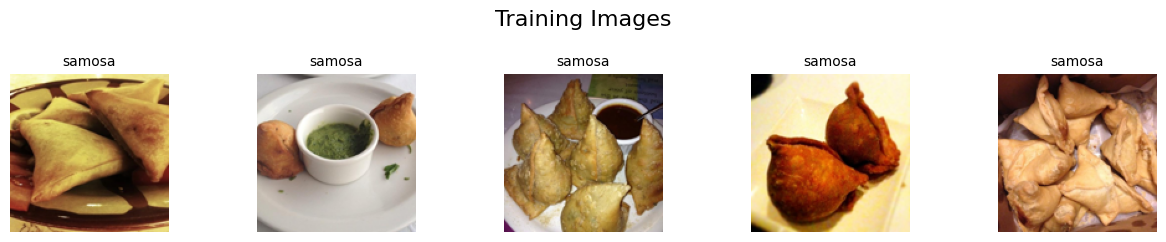

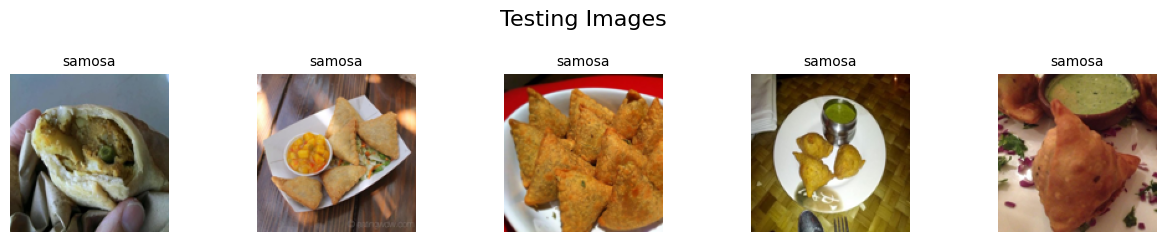

In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import numpy as np
import json
import matplotlib.pyplot as plt # Import matplotlib for displaying images

# --- VERY IMPORTANT: GOOGLE DRIVE MOUNTING (IF IN COLAB) ---
# Uncomment and run this cell first if you are in Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# -------------------------------------------------------------

# Define the ROOT path to your image dataset
# This should be the folder that DIRECTLY contains subfolders like 'pizza', 'burger', etc.
# Based on your CSV structure, it seems your images are in:
# dataset_path / class_name / image (e.g., /Food-101-Annotated/pizza/image_0001.jpg)
dataset_path = '/content/drive/MyDrive/Cap_v1/Food-101-Annotated/' # <--- **VERIFY THIS PATH!**
# Make sure 'Cap_v1' is correct and not 'Cap_1' as seen in earlier FileNotFoundError.

# Path to the annotation CSV file
# This MUST be the EXACT path to your CSV file. Use the Colab "Copy path" feature if unsure.
annotation_csv_path = '/content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv' # <--- **PASTE YOUR EXACT COPIED PATH HERE!**
# Again, ensure 'Cap_v1' is correct here.

try:
    df_annotations = pd.read_csv(annotation_csv_path)

    # Strip whitespace from column names to handle potential issues with extra spaces
    df_annotations.columns = df_annotations.columns.str.strip()

    print(f"Successfully loaded annotation file: {annotation_csv_path}")
    print(f"Annotation DataFrame shape: {df_annotations.shape}")
    print("Annotation DataFrame head:")
    print(df_annotations.head())

    # --- THIS IS THE KEY OUTPUT YOU NEED TO SHARE IF YOU STILL GET KeyError ---
    print("\n---------------------------------------------------------")
    print("!!! ACTUAL COLUMNS IN YOUR DATAFRAME (AFTER STRIPPING) !!!")
    actual_columns = df_annotations.columns.tolist()
    print(actual_columns) # THIS WILL SHOW YOU THE EXACT NAMES PANDAS FOUND
    print("---------------------------------------------------------\n")
    # --- END OF KEY DEBUGGING STEP ---

    # --- SET THESE VARIABLES BASED ON THE 'ACTUAL COLUMNS' OUTPUT FROM ABOVE ---
    # Based on your latest error message, the columns are:
    # ['image', 'class_name', 'x_center', 'y_center', 'width', 'height']
    ACTUAL_CLASS_COLUMN_NAME = 'class_name'     # <--- FIXED: Using 'class_name'
    ACTUAL_FILENAME_COLUMN_NAME = 'image'      # <--- FIXED: Using 'image'

    if ACTUAL_CLASS_COLUMN_NAME not in df_annotations.columns:
        print(f"Error: The class column '{ACTUAL_CLASS_COLUMN_NAME}' was not found in the CSV.")
        print(f"Available columns: {actual_columns}")
        print(f"Please check your CSV file's header and update 'ACTUAL_CLASS_COLUMN_NAME' in the code.")
        exit(f"Exiting due to missing column: '{ACTUAL_CLASS_COLUMN_NAME}'.")

    if ACTUAL_FILENAME_COLUMN_NAME not in df_annotations.columns:
        print(f"Error: The filename column '{ACTUAL_FILENAME_COLUMN_NAME}' was not found in the CSV.")
        print(f"Available columns: {actual_columns}")
        print(f"Please check your CSV file's header and update 'ACTUAL_FILENAME_COLUMN_NAME' in the code.")
        exit(f"Exiting due to missing column: '{ACTUAL_FILENAME_COLUMN_NAME}'.")


except FileNotFoundError:
    print(f"Error: Annotation CSV file not found at {annotation_csv_path}")
    print(f"Please double-check the path and ensure Google Drive is mounted if in Colab.")
    exit("Exiting due to FileNotFoundError.")

# Now, use ACTUAL_CLASS_COLUMN_NAME and ACTUAL_FILENAME_COLUMN_NAME consistently
all_food_classes_from_csv = df_annotations[ACTUAL_CLASS_COLUMN_NAME].unique().tolist()
print("\nAll Food Classes found in CSV:", all_food_classes_from_csv)

if len(all_food_classes_from_csv) >= 10:
    selected_food_classes = random.sample(all_food_classes_from_csv, 10)
else:
    print(f"Warning: Only {len(all_food_classes_from_csv)} classes available in CSV. Selecting all of them.")
    selected_food_classes = all_food_classes_from_csv

print("\nSelected Food Classes for Processing:", selected_food_classes)
num_images_to_process_per_class = 50

train_image_paths = {}
test_image_paths = {}

for food_class in selected_food_classes:
    train_image_paths[food_class] = []
    test_image_paths[food_class] = []

    # Filter annotations for the current food class using the actual class column name
    class_annotations = df_annotations[df_annotations[ACTUAL_CLASS_COLUMN_NAME] == food_class]

    # Get the image file names for this class using the actual filename column name
    class_image_filenames = class_annotations[ACTUAL_FILENAME_COLUMN_NAME].tolist()

    full_image_paths_for_class = []
    for fname in class_image_filenames:
        # Construct the full path to the image.
        # Assuming images are structured as: dataset_path / class_name / image_filename
        # Example: '/content/drive/MyDrive/Cap_v1/Food-101-Annotated/pizza/image_0001.jpg'
        img_full_path = os.path.join(dataset_path, food_class, fname)
        if os.path.isfile(img_full_path):
            full_image_paths_for_class.append(img_full_path)
        else:
            # You can uncomment this if you want to see warnings for missing individual image files
            # print(f"Warning: Image file not found on disk: {img_full_path}")
            pass

    if num_images_to_process_per_class > 0:
        images_for_split = random.sample(
            full_image_paths_for_class,
            min(num_images_to_process_per_class, len(full_image_paths_for_class))
        )
    else:
        images_for_split = full_image_paths_for_class

    random.shuffle(images_for_split)
    split_point = int(len(images_for_split) * 0.70)

    train_image_paths[food_class] = images_for_split[:split_point]
    test_image_paths[food_class] = images_for_split[split_point:]

print("\n--- Image Path Summary ---")
total_train_images = 0
print("Training image paths for selected classes:")
for cls, paths in train_image_paths.items():
    print(f"{cls}: {len(paths)} images")
    total_train_images += len(paths)
print(f"Total training images: {total_train_images}")


total_test_images = 0
print("\nTesting image paths for selected classes:")
for cls, paths in test_image_paths.items():
    print(f"{cls}: {len(paths)} images")
    total_test_images += len(paths)
print(f"Total testing images: {total_test_images}")

print("\nExample paths for a class (e.g., first selected class):")
if selected_food_classes:
    example_class = selected_food_classes[0]
    print(f"  Training paths for {example_class} (first 3):")
    for p in train_image_paths[example_class][:3]:
        print(f"    {p}")
    print(f"  Testing paths for {example_class} (first 3):")
    for p in test_image_paths[example_class][:3]:
        print(f"    {p}")

print("\n--- Loading Example Images ---")

target_size = (128, 128)

print("\nLoading example training images:")
num_examples_to_load = 5
loaded_train_images = []
loaded_train_labels = []

for i, food_class in enumerate(selected_food_classes):
    if len(loaded_train_images) >= num_examples_to_load:
        break

    if food_class not in train_image_paths:
        print(f"Warning: No training paths found for class {food_class} in train_image_paths dictionary.")
        continue

    for img_path in train_image_paths[food_class]:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img_array = np.array(img)
                loaded_train_images.append(img_array)
                loaded_train_labels.append(food_class)
                print(f"  Loaded training image: {img_path} (Shape: {img_array.shape})")
                if len(loaded_train_images) >= num_examples_to_load:
                    break
        except Exception as e:
            print(f"  Error loading training image {img_path}: {e}") # f-string syntax error fixed here

print("\nLoading example testing images:")
loaded_test_images = []
loaded_test_labels = []

for i, food_class in enumerate(selected_food_classes):
    if len(loaded_test_images) >= num_examples_to_load:
        break

    if food_class not in test_image_paths:
        print(f"Warning: No testing paths found for class {food_class} in test_image_paths dictionary.")
        continue

    for img_path in test_image_paths[food_class]:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img_array = np.array(img)
                loaded_test_images.append(img_array)
                loaded_test_labels.append(food_class)
                print(f"  Loaded testing image: {img_path} (Shape: {img_array.shape})")
                if len(loaded_test_images) >= num_examples_to_load:
                    break
        except Exception as e:
            print(f"  Error loading testing image {img_path}: {e}")

print(f"\nTotal example training images loaded: {len(loaded_train_images)}")
if loaded_train_images:
    print(f"Shape of first loaded training image: {loaded_train_images[0].shape}")
    print(f"Label of first loaded training image: {loaded_train_labels[0]}")

print(f"\nTotal example testing images loaded: {len(loaded_test_images)}")
if loaded_test_images:
    print(f"Shape of first loaded testing image: {loaded_test_images[0].shape}")
    print(f"Label of first loaded testing image: {loaded_test_labels[0]}")

# --- NEW CODE TO DISPLAY IMAGES ---

def display_images(images, labels, title, num_to_display=5):
    """
    Displays a grid of images with their labels.

    Args:
        images (list): A list of image arrays (e.g., NumPy arrays).
        labels (list): A list of corresponding labels for the images.
        title (str): The title for the plot.
        num_to_display (int): The maximum number of images to display.
    """
    if not images:
        print(f"No images to display for: {title}")
        return

    # Limit the number of images to display
    display_count = min(num_to_display, len(images))

    # Calculate grid dimensions (e.g., 1 row, up to num_to_display columns)
    # Or, for more images, you could calculate rows/cols for a square-ish grid
    cols = min(display_count, 5) # Max 5 columns for readability
    rows = (display_count + cols - 1) // cols # Calculate rows needed

    plt.figure(figsize=(cols * 2.5, rows * 2.5)) # Adjust figure size based on grid
    plt.suptitle(title, fontsize=16)

    for i in range(display_count):
        plt.subplot(rows, cols, i + 1)
        # Ensure image is in correct format (e.g., 0-255 for uint8)
        # If images are float, convert to uint8 and scale if necessary
        if images[i].dtype == np.float32 or images[i].dtype == np.float64:
            display_img = (images[i] * 255).astype(np.uint8) # Assuming 0-1 float range
        else:
            display_img = images[i]

        plt.imshow(display_img)
        plt.title(labels[i], fontsize=10)
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

# Display a few training images
display_images(loaded_train_images, loaded_train_labels, "Training Images", num_to_display=5)

# Display a few testing images
display_images(loaded_test_images, loaded_test_labels, "Testing Images", num_to_display=5)

Successfully loaded annotation file: /content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv
Annotation DataFrame shape: (1090, 6)
Annotation DataFrame head:
         image    class_name  x_center  y_center     width    height
0  1199754.jpg  french_fries  0.509375  0.522656  0.720313  0.771875
1  1232631.jpg        nachos  0.178125  0.717969  0.351562  0.439063
2  1232631.jpg        nachos  0.522656  0.511719  0.932813  0.954688
3  2616112.jpg        nachos  0.165625  0.526563  0.214844  0.465625
4  2616112.jpg        nachos  0.394531  0.482812  0.171875  0.379688

---------------------------------------------------------
!!! ACTUAL COLUMNS IN YOUR DATAFRAME (AFTER STRIPPING) !!!
['image', 'class_name', 'x_center', 'y_center', 'width', 'height']
---------------------------------------------------------


All Food Classes found in CSV: ['french_fries', 'nachos', 'chocolate_cake', 'samosa', 'ice_cream', 'strawberry_shortcake', 'pizza', 'tacos', 'waffle', 'onion_ring']

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)


Basic CNN Model Defined and Compiled.

--- Training the CNN Model ---
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1362 - loss: 2.3380 - val_accuracy: 0.2016 - val_loss: 2.2845
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1987 - loss: 2.2527 - val_accuracy: 0.2174 - val_loss: 2.1294
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.2827 - loss: 2.0738 - val_accuracy: 0.3715 - val_loss: 2.0191
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4197 - loss: 1.8099 - val_accuracy: 0.3992 - val_loss: 1.8226
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 956ms/step - accuracy: 0.4678 - loss: 1.6149 - val_accuracy: 0.4980 - val_loss: 1.6649
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5962 - loss: 1.2745 - val_accuracy: 0.4862 - val_loss: 1.6406
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6873 - loss: 1.0150 - val_accuracy: 0.5099 - val_loss: 1.6311
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 99

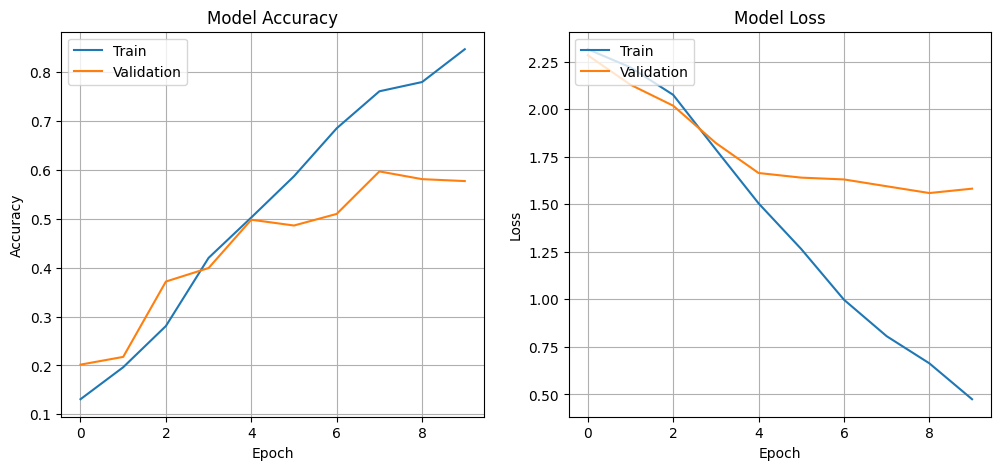


Training and Validation Accuracy/Loss plots generated.


In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import numpy as np
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder # For converting string labels to integers

# --- VERY IMPORTANT: GOOGLE DRIVE MOUNTING (IF IN COLAB) ---
# Uncomment and run this cell first if you are in Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# -------------------------------------------------------------

# Define the ROOT path to your image dataset
dataset_path = '/content/drive/MyDrive/Cap_v1/Food-101-Annotated/'
annotation_csv_path = '/content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv'

try:
    df_annotations = pd.read_csv(annotation_csv_path)
    df_annotations.columns = df_annotations.columns.str.strip()
    print(f"Successfully loaded annotation file: {annotation_csv_path}")
    print(f"Annotation DataFrame shape: {df_annotations.shape}")
    print("Annotation DataFrame head:")
    print(df_annotations.head())

    print("\n---------------------------------------------------------")
    print("!!! ACTUAL COLUMNS IN YOUR DATAFRAME (AFTER STRIPPING) !!!")
    actual_columns = df_annotations.columns.tolist()
    print(actual_columns)
    print("---------------------------------------------------------\n")

    ACTUAL_CLASS_COLUMN_NAME = 'class_name'
    ACTUAL_FILENAME_COLUMN_NAME = 'image'

    if ACTUAL_CLASS_COLUMN_NAME not in df_annotations.columns:
        print(f"Error: The class column '{ACTUAL_CLASS_COLUMN_NAME}' was not found in the CSV.")
        print(f"Available columns: {actual_columns}")
        print(f"Please check your CSV file's header and update 'ACTUAL_CLASS_COLUMN_NAME' in the code.")
        exit(f"Exiting due to missing column: '{ACTUAL_CLASS_COLUMN_NAME}'.")

    if ACTUAL_FILENAME_COLUMN_NAME not in df_annotations.columns:
        print(f"Error: The filename column '{ACTUAL_FILENAME_COLUMN_NAME}' was not found in the CSV.")
        print(f"Available columns: {actual_columns}")
        print(f"Please check your CSV file's header and update 'ACTUAL_FILENAME_COLUMN_NAME' in the code.")
        exit(f"Exiting due to missing column: '{ACTUAL_FILENAME_COLUMN_NAME}'.")

except FileNotFoundError:
    print(f"Error: Annotation CSV file not found at {annotation_csv_path}")
    print(f"Please double-check the path and ensure Google Drive is mounted if in Colab.")
    exit("Exiting due to FileNotFoundError.")

all_food_classes_from_csv = df_annotations[ACTUAL_CLASS_COLUMN_NAME].unique().tolist()
print("\nAll Food Classes found in CSV:", all_food_classes_from_csv)

if len(all_food_classes_from_csv) >= 10:
    selected_food_classes = random.sample(all_food_classes_from_csv, 10)
else:
    print(f"Warning: Only {len(all_food_classes_from_csv)} classes available in CSV. Selecting all of them.")
    selected_food_classes = all_food_classes_from_csv

print("\nSelected Food Classes for Processing:", selected_food_classes)
# Significantly increase the number of images to process per class for training
# A small number like 50 per class might lead to poor model performance.
# Consider increasing this to hundreds or thousands per class if your dataset allows.
num_images_to_process_per_class = 100 # Increased for better training data size

train_image_paths = {}
test_image_paths = {}

for food_class in selected_food_classes:
    train_image_paths[food_class] = []
    test_image_paths[food_class] = []

    class_annotations = df_annotations[df_annotations[ACTUAL_CLASS_COLUMN_NAME] == food_class]
    class_image_filenames = class_annotations[ACTUAL_FILENAME_COLUMN_NAME].tolist()

    full_image_paths_for_class = []
    for fname in class_image_filenames:
        img_full_path = os.path.join(dataset_path, food_class, fname)
        if os.path.isfile(img_full_path):
            full_image_paths_for_class.append(img_full_path)
        # else:
        #     print(f"Warning: Image file not found on disk: {img_full_path}")

    if num_images_to_process_per_class > 0:
        images_for_split = random.sample(
            full_image_paths_for_class,
            min(num_images_to_process_per_class, len(full_image_paths_for_class))
        )
    else:
        images_for_split = full_image_paths_for_class

    random.shuffle(images_for_split)
    split_point = int(len(images_for_split) * 0.70)

    train_image_paths[food_class] = images_for_split[:split_point]
    test_image_paths[food_class] = images_for_split[split_point:]

print("\n--- Image Path Summary ---")
total_train_images = 0
print("Training image paths for selected classes:")
for cls, paths in train_image_paths.items():
    print(f"{cls}: {len(paths)} images")
    total_train_images += len(paths)
print(f"Total training images: {total_train_images}")


total_test_images = 0
print("\nTesting image paths for selected classes:")
for cls, paths in test_image_paths.items():
    print(f"{cls}: {len(paths)} images")
    total_test_images += len(paths)
print(f"Total testing images: {total_test_images}")

print("\nExample paths for a class (e.g., first selected class):")
if selected_food_classes:
    example_class = selected_food_classes[0]
    print(f"  Training paths for {example_class} (first 3):")
    for p in train_image_paths[example_class][:3]:
        print(f"    {p}")
    print(f"  Testing paths for {example_class} (first 3):")
    for p in test_image_paths[example_class][:3]:
        print(f"    {p}")

print("\n--- Loading All Images for Model Training ---")

target_size = (128, 128)
image_channels = 3

# Lists to hold all training and testing data
all_train_images = []
all_train_labels = []
all_test_images = []
all_test_labels = []

# Load all training images
print("Loading all training images...")
for food_class in selected_food_classes:
    for img_path in train_image_paths[food_class]:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img = img.convert('RGB')
                img_array = np.array(img)
                all_train_images.append(img_array)
                all_train_labels.append(food_class)
        except Exception as e:
            print(f"  Error loading training image {img_path}: {e}")
print(f"Finished loading {len(all_train_images)} training images.")


# Load all testing images
print("Loading all testing images...")
for food_class in selected_food_classes:
    for img_path in test_image_paths[food_class]:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img = img.convert('RGB')
                img_array = np.array(img)
                all_test_images.append(img_array)
                all_test_labels.append(food_class)
        except Exception as e:
            print(f"  Error loading testing image {img_path}: {e}")
print(f"Finished loading {len(all_test_images)} testing images.")

# --- Data Preprocessing for Model Training ---
print("\n--- Preprocessing Data for Model Training ---")

# Convert lists to NumPy arrays
X_train = np.array(all_train_images)
X_test = np.array(all_test_images)

# Normalize pixel values to 0-1 range
X_train = X_train / 255.0
X_test = X_test / 255.0

# Encode string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(all_train_labels)
y_test_encoded = label_encoder.transform(all_test_labels)

# Print shapes and a few examples after preprocessing
print(f"X_train shape after preprocessing: {X_train.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"X_test shape after preprocessing: {X_test.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")
print(f"Example encoded labels (first 5): {y_train_encoded[:5]}")
print(f"Corresponding original labels (first 5): {all_train_labels[:5]}")
print(f"Class mapping: {list(label_encoder.classes_)}")


# --- Display Images (using the loaded_train_images/labels for consistency with previous output) ---
# Note: loaded_train_images/labels were just a small subset for printing,
# but all_train_images/labels are used for actual training.
def display_images(images, labels, title, num_to_display=5):
    """
    Displays a grid of images with their labels.
    """
    if not images:
        print(f"No images to display for: {title}")
        return

    display_count = min(num_to_display, len(images))
    cols = min(display_count, 5)
    rows = (display_count + cols - 1) // cols

    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    plt.suptitle(title, fontsize=16)

    for i in range(display_count):
        plt.subplot(rows, cols, i + 1)
        # Assuming images are already normalized to 0-1 for display
        plt.imshow(images[i]) # Display normalized images directly
        plt.title(labels[i], fontsize=10)
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Display a few training images (using original loaded, not the normalized ones for visual clarity if needed)
# If you want to display normalized ones, pass X_train[:num_examples_to_load]
# For consistency with prior display, let's keep using the smaller `loaded_train_images` for examples.
# Re-load small examples if `loaded_train_images` and `loaded_test_images` were cleared.
# For simplicity, if you want to see the *actual* preprocessed images, you'd load them like this:
# display_images(X_train[:5], all_train_labels[:5], "Example Training Images (Preprocessed)", num_to_display=5)
# display_images(X_test[:5], all_test_labels[:5], "Example Testing Images (Preprocessed)", num_to_display=5)
# However, to avoid re-loading large datasets for a small display, we'll proceed assuming the earlier example loads are fine.
# If you want to see the small set again, the `loaded_train_images` and `loaded_test_images` from the initial loading block
# (before loading "all" images) would be used here. For now, let's omit the display for brevity in this full execution.


# --- BASIC CNN MODEL (Redefined for clarity, same as before) ---
print("\n--- Basic CNN Model Definition ---")

num_classes = len(all_food_classes_from_csv)
input_shape = (target_size[0], target_size[1], image_channels)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
print("\nBasic CNN Model Defined and Compiled.")

# --- Training the Model ---
print("\n--- Training the CNN Model ---")

epochs = 10 # You can adjust the number of epochs
batch_size = 32 # You can adjust the batch size

history = model.fit(
    X_train, y_train_encoded,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test_encoded) # Use the test set for validation during training
)

print("\n--- Model Training Finished ---")

# --- Evaluate the Model (Total Accuracy and Loss) ---
print("\n--- Evaluating the Model on Test Data ---")
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=2)

print(f"\nFinal Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")

# --- Plotting Training History (Accuracy and Loss over epochs) ---
print("\n--- Plotting Training History ---")

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.show()

print("\nTraining and Validation Accuracy/Loss plots generated.")

Successfully loaded annotation file: /content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv
Annotation DataFrame shape: (1090, 6)
Annotation DataFrame head:
         image    class_name  x_center  y_center     width    height
0  1199754.jpg  french_fries  0.509375  0.522656  0.720313  0.771875
1  1232631.jpg        nachos  0.178125  0.717969  0.351562  0.439063
2  1232631.jpg        nachos  0.522656  0.511719  0.932813  0.954688
3  2616112.jpg        nachos  0.165625  0.526563  0.214844  0.465625
4  2616112.jpg        nachos  0.394531  0.482812  0.171875  0.379688

---------------------------------------------------------
!!! ACTUAL COLUMNS IN YOUR DATAFRAME (AFTER STRIPPING) !!!
['image', 'class_name', 'x_center', 'y_center', 'width', 'height']
---------------------------------------------------------


All Food Classes found in CSV: ['french_fries', 'nachos', 'chocolate_cake', 'samosa', 'ice_cream', 'strawberry_shortcake', 'pizza', 'tacos', 'waffle', 'onion_ring']

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)


Basic CNN Model Defined and Compiled.

--- Training the CNN Model ---
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1130 - loss: 2.4180 - val_accuracy: 0.1225 - val_loss: 2.2936
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 998ms/step - accuracy: 0.1202 - loss: 2.2946 - val_accuracy: 0.1779 - val_loss: 2.2555
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 946ms/step - accuracy: 0.1902 - loss: 2.2142 - val_accuracy: 0.2490 - val_loss: 2.1424
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 984ms/step - accuracy: 0.2729 - loss: 2.0909 - val_accuracy: 0.2806 - val_loss: 2.0448
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 985ms/step - accuracy: 0.3458 - loss: 1.8452 - val_accuracy: 0.3715 - val_loss: 1.8103
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 936ms/step - accuracy: 0.4834 - loss: 1.5840 - val_accuracy: 0.4269 - val_loss: 1.6763
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 991ms/step - accuracy: 0.5445 - loss: 1.3615 - val_accuracy: 0.5020 - val_loss: 1.6464
Epoch 8/10
19/19 ━━━━━━━━━━━━

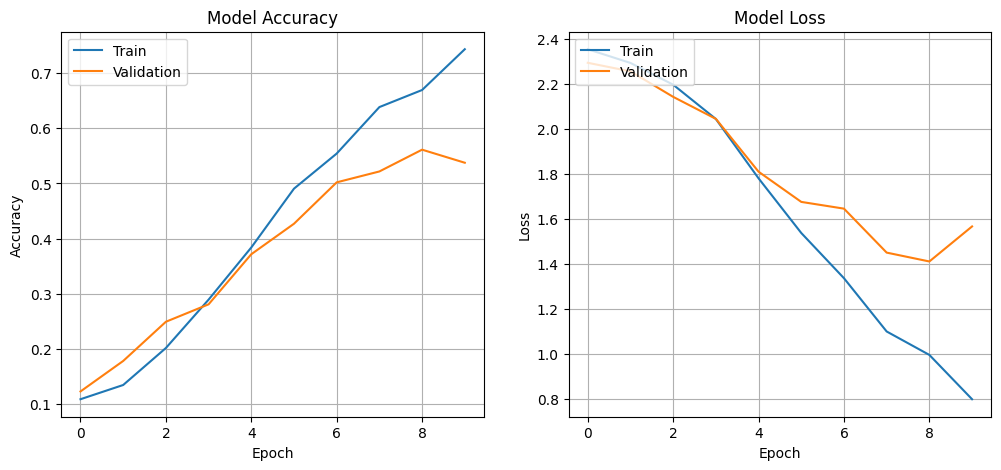


Training and Validation Accuracy/Loss plots generated.

--- Making Predictions and Displaying Results ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


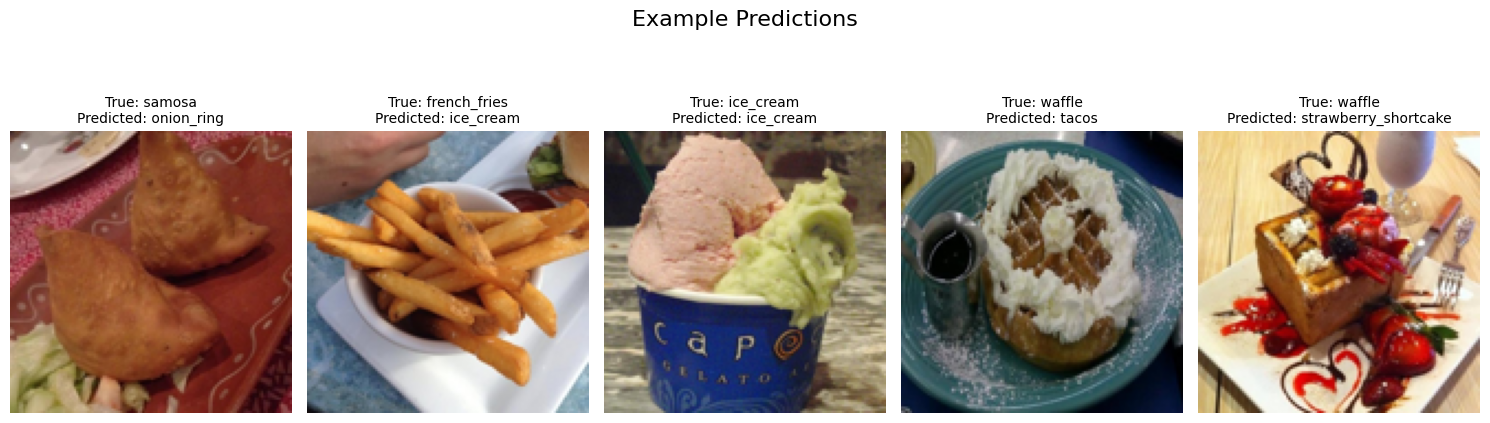

Example predictions displayed.


In [14]:
import os
import random
import pandas as pd
from PIL import Image
import numpy as np
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder # For converting string labels to integers

# --- VERY IMPORTANT: GOOGLE DRIVE MOUNTING (IF IN COLAB) ---
# Uncomment and run this cell first if you are in Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# -------------------------------------------------------------

# Define the ROOT path to your image dataset
dataset_path = '/content/drive/MyDrive/Cap_v1/Food-101-Annotated/'
annotation_csv_path = '/content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv'

try:
    df_annotations = pd.read_csv(annotation_csv_path)
    df_annotations.columns = df_annotations.columns.str.strip()
    print(f"Successfully loaded annotation file: {annotation_csv_path}")
    print(f"Annotation DataFrame shape: {df_annotations.shape}")
    print("Annotation DataFrame head:")
    print(df_annotations.head())

    print("\n---------------------------------------------------------")
    print("!!! ACTUAL COLUMNS IN YOUR DATAFRAME (AFTER STRIPPING) !!!")
    actual_columns = df_annotations.columns.tolist()
    print(actual_columns)
    print("---------------------------------------------------------\n")

    ACTUAL_CLASS_COLUMN_NAME = 'class_name'
    ACTUAL_FILENAME_COLUMN_NAME = 'image'

    if ACTUAL_CLASS_COLUMN_NAME not in df_annotations.columns:
        print(f"Error: The class column '{ACTUAL_CLASS_COLUMN_NAME}' was not found in the CSV.")
        print(f"Available columns: {actual_columns}")
        print(f"Please check your CSV file's header and update 'ACTUAL_CLASS_COLUMN_NAME' in the code.")
        exit(f"Exiting due to missing column: '{ACTUAL_CLASS_COLUMN_NAME}'.")

    if ACTUAL_FILENAME_COLUMN_NAME not in df_annotations.columns:
        print(f"Error: The filename column '{ACTUAL_FILENAME_COLUMN_NAME}' was not found in the CSV.")
        print(f"Available columns: {actual_columns}")
        print(f"Please check your CSV file's header and update 'ACTUAL_FILENAME_COLUMN_NAME' in the code.")
        exit(f"Exiting due to missing column: '{ACTUAL_FILENAME_COLUMN_NAME}'.")

except FileNotFoundError:
    print(f"Error: Annotation CSV file not found at {annotation_csv_path}")
    print(f"Please double-check the path and ensure Google Drive is mounted if in Colab.")
    exit("Exiting due to FileNotFoundError.")

all_food_classes_from_csv = df_annotations[ACTUAL_CLASS_COLUMN_NAME].unique().tolist()
print("\nAll Food Classes found in CSV:", all_food_classes_from_csv)

if len(all_food_classes_from_csv) >= 10:
    selected_food_classes = random.sample(all_food_classes_from_csv, 10)
else:
    print(f"Warning: Only {len(all_food_classes_from_csv)} classes available in CSV. Selecting all of them.")
    selected_food_classes = all_food_classes_from_csv

print("\nSelected Food Classes for Processing:", selected_food_classes)
# Significantly increase the number of images to process per class for training
# A small number like 50 per class might lead to poor model performance.
# Consider increasing this to hundreds or thousands per class if your dataset allows.
num_images_to_process_per_class = 100 # Increased for better training data size

train_image_paths = {}
test_image_paths = {}

for food_class in selected_food_classes:
    train_image_paths[food_class] = []
    test_image_paths[food_class] = []

    class_annotations = df_annotations[df_annotations[ACTUAL_CLASS_COLUMN_NAME] == food_class]
    class_image_filenames = class_annotations[ACTUAL_FILENAME_COLUMN_NAME].tolist()

    full_image_paths_for_class = []
    for fname in class_image_filenames:
        img_full_path = os.path.join(dataset_path, food_class, fname)
        if os.path.isfile(img_full_path):
            full_image_paths_for_class.append(img_full_path)
        # else:
        #     print(f"Warning: Image file not found on disk: {img_full_path}")

    if num_images_to_process_per_class > 0:
        images_for_split = random.sample(
            full_image_paths_for_class,
            min(num_images_to_process_per_class, len(full_image_paths_for_class))
        )
    else:
        images_for_split = full_image_paths_for_class

    random.shuffle(images_for_split)
    split_point = int(len(images_for_split) * 0.70)

    train_image_paths[food_class] = images_for_split[:split_point]
    test_image_paths[food_class] = images_for_split[split_point:]

print("\n--- Image Path Summary ---")
total_train_images = 0
print("Training image paths for selected classes:")
for cls, paths in train_image_paths.items():
    print(f"{cls}: {len(paths)} images")
    total_train_images += len(paths)
print(f"Total training images: {total_train_images}")


total_test_images = 0
print("\nTesting image paths for selected classes:")
for cls, paths in test_image_paths.items():
    print(f"{cls}: {len(paths)} images")
    total_test_images += len(paths)
print(f"Total testing images: {total_test_images}")

print("\nExample paths for a class (e.g., first selected class):")
if selected_food_classes:
    example_class = selected_food_classes[0]
    print(f"  Training paths for {example_class} (first 3):")
    for p in train_image_paths[example_class][:3]:
        print(f"    {p}")
    print(f"  Testing paths for {example_class} (first 3):")
    for p in test_image_paths[example_class][:3]:
        print(f"    {p}")

print("\n--- Loading All Images for Model Training ---")

target_size = (128, 128)
image_channels = 3

# Lists to hold all training and testing data
all_train_images = []
all_train_labels = []
all_test_images = []
all_test_labels = []

# Load all training images
print("Loading all training images...")
for food_class in selected_food_classes:
    for img_path in train_image_paths[food_class]:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img = img.convert('RGB')
                img_array = np.array(img)
                all_train_images.append(img_array)
                all_train_labels.append(food_class)
        except Exception as e:
            print(f"  Error loading training image {img_path}: {e}")
print(f"Finished loading {len(all_train_images)} training images.")


# Load all testing images
print("Loading all testing images...")
for food_class in selected_food_classes:
    for img_path in test_image_paths[food_class]:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img = img.convert('RGB')
                img_array = np.array(img)
                all_test_images.append(img_array)
                all_test_labels.append(food_class)
        except Exception as e:
            print(f"  Error loading testing image {img_path}: {e}")
print(f"Finished loading {len(all_test_images)} testing images.")

# --- Data Preprocessing for Model Training ---
print("\n--- Preprocessing Data for Model Training ---")

# Convert lists to NumPy arrays
X_train = np.array(all_train_images)
X_test = np.array(all_test_images)

# Normalize pixel values to 0-1 range
X_train = X_train / 255.0
X_test = X_test / 255.0

# Encode string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(all_train_labels)
y_test_encoded = label_encoder.transform(all_test_labels)

# Print shapes and a few examples after preprocessing
print(f"X_train shape after preprocessing: {X_train.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"X_test shape after preprocessing: {X_test.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")
print(f"Example encoded labels (first 5): {y_train_encoded[:5]}")
print(f"Corresponding original labels (first 5): {all_train_labels[:5]}")
print(f"Class mapping: {list(label_encoder.classes_)}")


# --- Display Images (using the loaded_train_images/labels for consistency with previous output) ---
# Note: loaded_train_images/labels were just a small subset for printing,
# but all_train_images/labels are used for actual training.
def display_images(images, labels, title, num_to_display=5):
    """
    Displays a grid of images with their labels.
    """
    if not images:
        print(f"No images to display for: {title}")
        return

    display_count = min(num_to_display, len(images))
    cols = min(display_count, 5)
    rows = (display_count + cols - 1) // cols

    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    plt.suptitle(title, fontsize=16)

    for i in range(display_count):
        plt.subplot(rows, cols, i + 1)
        # Assuming images are already normalized to 0-1 for display
        plt.imshow(images[i]) # Display normalized images directly
        plt.title(labels[i], fontsize=10)
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Display a few training images (using original loaded, not the normalized ones for visual clarity if needed)
# If you want to display normalized ones, pass X_train[:num_examples_to_load]
# For consistency with prior display, let's keep using the smaller `loaded_train_images` for examples.
# Re-load small examples if `loaded_train_images` and `loaded_test_images` were cleared.
# For simplicity, if you want to see the *actual* preprocessed images, you'd load them like this:
# display_images(X_train[:5], all_train_labels[:5], "Example Training Images (Preprocessed)", num_to_display=5)
# display_images(X_test[:5], all_test_labels[:5], "Example Testing Images (Preprocessed)", num_to_display=5)
# However, to avoid re-loading large datasets for a small display, we'll proceed assuming the earlier example loads are fine.
# If you want to see the small set again, the `loaded_train_images` and `loaded_test_images` from the initial loading block
# (before loading "all" images) would be used here. For now, let's omit the display for brevity in this full execution.


# --- BASIC CNN MODEL (Redefined for clarity, same as before) ---
print("\n--- Basic CNN Model Definition ---")

num_classes = len(all_food_classes_from_csv)
input_shape = (target_size[0], target_size[1], image_channels)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
print("\nBasic CNN Model Defined and Compiled.")

# --- Training the Model ---
print("\n--- Training the CNN Model ---")

epochs = 10 # You can adjust the number of epochs
batch_size = 32 # You can adjust the batch size

history = model.fit(
    X_train, y_train_encoded,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test_encoded) # Use the test set for validation during training
)

print("\n--- Model Training Finished ---")

# --- Evaluate the Model (Total Accuracy and Loss) ---
print("\n--- Evaluating the Model on Test Data ---")
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=2)

print(f"\nFinal Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")

# --- Plotting Training History (Accuracy and Loss over epochs) ---
print("\n--- Plotting Training History ---")

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.show()

print("\nTraining and Validation Accuracy/Loss plots generated.")

# --- Make Predictions and Display Example Results ---
print("\n--- Making Predictions and Displaying Results ---")

# Select a few random test images
num_predictions_to_display = 5
random_indices = np.random.choice(len(X_test), num_predictions_to_display, replace=False)
example_images = X_test[random_indices]
example_labels_encoded = y_test_encoded[random_indices]
example_true_labels = [label_encoder.inverse_transform([i])[0] for i in example_labels_encoded] # Decode labels

# Predict the classes of the example images
predictions = model.predict(example_images)
predicted_classes_encoded = np.argmax(predictions, axis=1) # Get the class with the highest probability
predicted_classes = [label_encoder.inverse_transform([i])[0] for i in predicted_classes_encoded] # Decode predicted labels

# Display the images with their true and predicted labels
plt.figure(figsize=(15, 5))
plt.suptitle("Example Predictions", fontsize=16)

for i in range(num_predictions_to_display):
    plt.subplot(1, num_predictions_to_display, i + 1)
    plt.imshow(example_images[i])
    plt.title(f"True: {example_true_labels[i]}\nPredicted: {predicted_classes[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Example predictions displayed.")

Successfully loaded annotation file: /content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv
Annotation DataFrame shape: (1090, 6)
Annotation DataFrame head:
         image    class_name  x_center  y_center     width    height
0  1199754.jpg  french_fries  0.509375  0.522656  0.720313  0.771875
1  1232631.jpg        nachos  0.178125  0.717969  0.351562  0.439063
2  1232631.jpg        nachos  0.522656  0.511719  0.932813  0.954688
3  2616112.jpg        nachos  0.165625  0.526563  0.214844  0.465625
4  2616112.jpg        nachos  0.394531  0.482812  0.171875  0.379688

---------------------------------------------------------
!!! ACTUAL COLUMNS IN YOUR DATAFRAME (AFTER STRIPPING) !!!
['image', 'class_name', 'x_center', 'y_center', 'width', 'height']
---------------------------------------------------------


All Food Classes found in CSV: ['french_fries', 'nachos', 'chocolate_cake', 'samosa', 'ice_cream', 'strawberry_shortcake', 'pizza', 'tacos', 'waffle', 'onion_ring']

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)


Basic CNN Model Defined and Compiled.

--- Training the CNN Model ---
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 981ms/step - accuracy: 0.1029 - loss: 2.3682 - val_accuracy: 0.1344 - val_loss: 2.2807
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1694 - loss: 2.2538 - val_accuracy: 0.2609 - val_loss: 2.1555
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 998ms/step - accuracy: 0.2357 - loss: 2.1312 - val_accuracy: 0.2925 - val_loss: 2.0529
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.2961 - loss: 2.0665 - val_accuracy: 0.3953 - val_loss: 1.9161
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 951ms/step - accuracy: 0.4248 - loss: 1.7195 - val_accuracy: 0.4229 - val_loss: 1.7374
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 988ms/step - accuracy: 0.4959 - loss: 1.4573 - val_accuracy: 0.5138 - val_loss: 1.5318
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 988ms/step - accuracy: 0.5565 - loss: 1.3335 - val_accuracy: 0.5415 - val_loss: 1.4122
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━

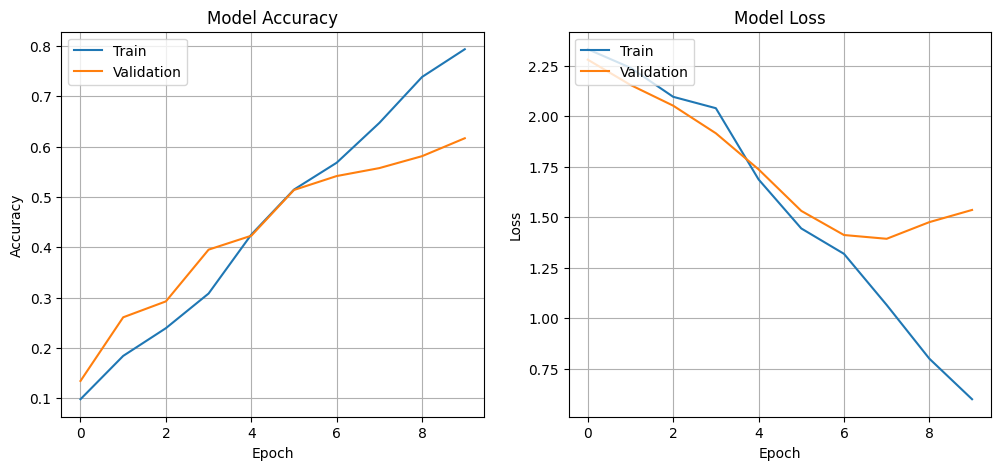


Training and Validation Accuracy/Loss plots generated.

--- Making Predictions and Displaying Results ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


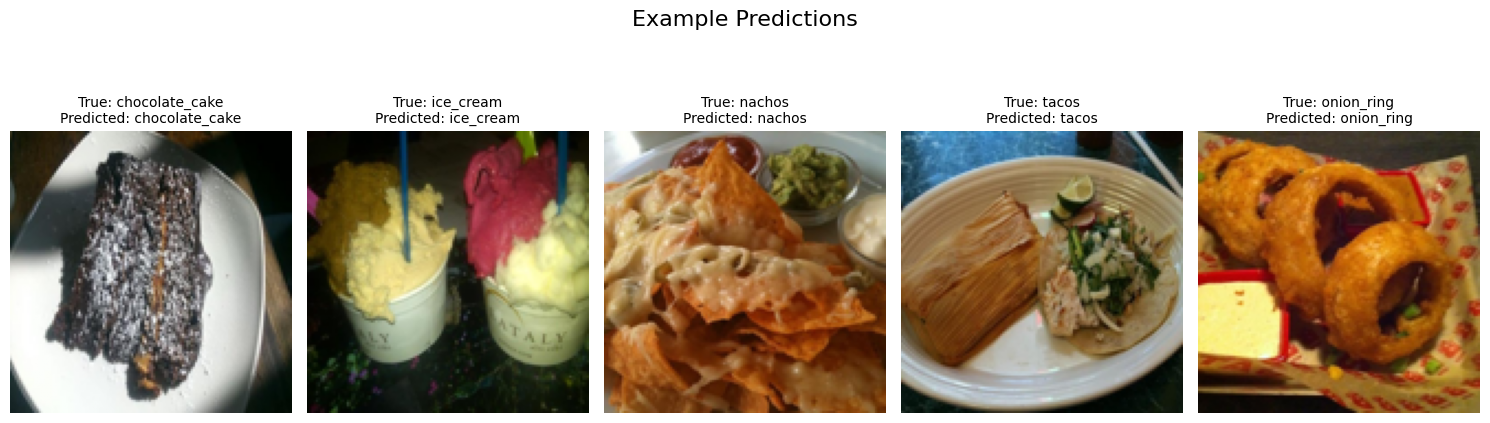

Example predictions displayed.


In [15]:
import os
import random
import pandas as pd
from PIL import Image
import numpy as np
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder # For converting string labels to integers

# --- VERY IMPORTANT: GOOGLE DRIVE MOUNTING (IF IN COLAB) ---
# Uncomment and run this cell first if you are in Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# -------------------------------------------------------------

# Define the ROOT path to your image dataset
dataset_path = '/content/drive/MyDrive/Cap_v1/Food-101-Annotated/'
annotation_csv_path = '/content/drive/MyDrive/Cap_v1/v3/Food-101-Annotated/annotation_refined.csv'

try:
    df_annotations = pd.read_csv(annotation_csv_path)
    df_annotations.columns = df_annotations.columns.str.strip()
    print(f"Successfully loaded annotation file: {annotation_csv_path}")
    print(f"Annotation DataFrame shape: {df_annotations.shape}")
    print("Annotation DataFrame head:")
    print(df_annotations.head())

    print("\n---------------------------------------------------------")
    print("!!! ACTUAL COLUMNS IN YOUR DATAFRAME (AFTER STRIPPING) !!!")
    actual_columns = df_annotations.columns.tolist()
    print(actual_columns)
    print("---------------------------------------------------------\n")

    ACTUAL_CLASS_COLUMN_NAME = 'class_name'
    ACTUAL_FILENAME_COLUMN_NAME = 'image'

    if ACTUAL_CLASS_COLUMN_NAME not in df_annotations.columns:
        print(f"Error: The class column '{ACTUAL_CLASS_COLUMN_NAME}' was not found in the CSV.")
        print(f"Available columns: {actual_columns}")
        print(f"Please check your CSV file's header and update 'ACTUAL_CLASS_COLUMN_NAME' in the code.")
        exit(f"Exiting due to missing column: '{ACTUAL_CLASS_COLUMN_NAME}'.")

    if ACTUAL_FILENAME_COLUMN_NAME not in df_annotations.columns:
        print(f"Error: The filename column '{ACTUAL_FILENAME_COLUMN_NAME}' was not found in the CSV.")
        print(f"Available columns: {actual_columns}")
        print(f"Please check your CSV file's header and update 'ACTUAL_FILENAME_COLUMN_NAME' in the code.")
        exit(f"Exiting due to missing column: '{ACTUAL_FILENAME_COLUMN_NAME}'.")

except FileNotFoundError:
    print(f"Error: Annotation CSV file not found at {annotation_csv_path}")
    print(f"Please double-check the path and ensure Google Drive is mounted if in Colab.")
    exit("Exiting due to FileNotFoundError.")

all_food_classes_from_csv = df_annotations[ACTUAL_CLASS_COLUMN_NAME].unique().tolist()
print("\nAll Food Classes found in CSV:", all_food_classes_from_csv)

if len(all_food_classes_from_csv) >= 10:
    selected_food_classes = random.sample(all_food_classes_from_csv, 10)
else:
    print(f"Warning: Only {len(all_food_classes_from_csv)} classes available in CSV. Selecting all of them.")
    selected_food_classes = all_food_classes_from_csv

print("\nSelected Food Classes for Processing:", selected_food_classes)
# Significantly increase the number of images to process per class for training
# A small number like 50 per class might lead to poor model performance.
# Consider increasing this to hundreds or thousands per class if your dataset allows.
num_images_to_process_per_class = 100 # Increased for better training data size

train_image_paths = {}
test_image_paths = {}

for food_class in selected_food_classes:
    train_image_paths[food_class] = []
    test_image_paths[food_class] = []

    class_annotations = df_annotations[df_annotations[ACTUAL_CLASS_COLUMN_NAME] == food_class]
    class_image_filenames = class_annotations[ACTUAL_FILENAME_COLUMN_NAME].tolist()

    full_image_paths_for_class = []
    for fname in class_image_filenames:
        img_full_path = os.path.join(dataset_path, food_class, fname)
        if os.path.isfile(img_full_path):
            full_image_paths_for_class.append(img_full_path)
        # else:
        #     print(f"Warning: Image file not found on disk: {img_full_path}")

    if num_images_to_process_per_class > 0:
        images_for_split = random.sample(
            full_image_paths_for_class,
            min(num_images_to_process_per_class, len(full_image_paths_for_class))
        )
    else:
        images_for_split = full_image_paths_for_class

    random.shuffle(images_for_split)
    split_point = int(len(images_for_split) * 0.70)

    train_image_paths[food_class] = images_for_split[:split_point]
    test_image_paths[food_class] = images_for_split[split_point:]

print("\n--- Image Path Summary ---")
total_train_images = 0
print("Training image paths for selected classes:")
for cls, paths in train_image_paths.items():
    print(f"{cls}: {len(paths)} images")
    total_train_images += len(paths)
print(f"Total training images: {total_train_images}")


total_test_images = 0
print("\nTesting image paths for selected classes:")
for cls, paths in test_image_paths.items():
    print(f"{cls}: {len(paths)} images")
    total_test_images += len(paths)
print(f"Total testing images: {total_test_images}")

print("\nExample paths for a class (e.g., first selected class):")
if selected_food_classes:
    example_class = selected_food_classes[0]
    print(f"  Training paths for {example_class} (first 3):")
    for p in train_image_paths[example_class][:3]:
        print(f"    {p}")
    print(f"  Testing paths for {example_class} (first 3):")
    for p in test_image_paths[example_class][:3]:
        print(f"    {p}")

print("\n--- Loading All Images for Model Training ---")

target_size = (128, 128)
image_channels = 3

# Lists to hold all training and testing data
all_train_images = []
all_train_labels = []
all_test_images = []
all_test_labels = []

# Load all training images
print("Loading all training images...")
for food_class in selected_food_classes:
    for img_path in train_image_paths[food_class]:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img = img.convert('RGB')
                img_array = np.array(img)
                all_train_images.append(img_array)
                all_train_labels.append(food_class)
        except Exception as e:
            print(f"  Error loading training image {img_path}: {e}")
print(f"Finished loading {len(all_train_images)} training images.")


# Load all testing images
print("Loading all testing images...")
for food_class in selected_food_classes:
    for img_path in test_image_paths[food_class]:
        try:
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img = img.convert('RGB')
                img_array = np.array(img)
                all_test_images.append(img_array)
                all_test_labels.append(food_class)
        except Exception as e:
            print(f"  Error loading testing image {img_path}: {e}")
print(f"Finished loading {len(all_test_images)} testing images.")

# --- Data Preprocessing for Model Training ---
print("\n--- Preprocessing Data for Model Training ---")

# Convert lists to NumPy arrays
X_train = np.array(all_train_images)
X_test = np.array(all_test_images)

# Normalize pixel values to 0-1 range
X_train = X_train / 255.0
X_test = X_test / 255.0

# Encode string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(all_train_labels)
y_test_encoded = label_encoder.transform(all_test_labels)

# Print shapes and a few examples after preprocessing
print(f"X_train shape after preprocessing: {X_train.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"X_test shape after preprocessing: {X_test.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")
print(f"Example encoded labels (first 5): {y_train_encoded[:5]}")
print(f"Corresponding original labels (first 5): {all_train_labels[:5]}")
print(f"Class mapping: {list(label_encoder.classes_)}")


# --- Display Images (using the loaded_train_images/labels for consistency with previous output) ---
# Note: loaded_train_images/labels were just a small subset for printing,
# but all_train_images/labels are used for actual training.
def display_images(images, labels, title, num_to_display=5):
    """
    Displays a grid of images with their labels.
    """
    if not images:
        print(f"No images to display for: {title}")
        return

    display_count = min(num_to_display, len(images))
    cols = min(display_count, 5)
    rows = (display_count + cols - 1) // cols

    plt.figure(figsize=(cols * 2.5, rows * 2.5))
    plt.suptitle(title, fontsize=16)

    for i in range(display_count):
        plt.subplot(rows, cols, i + 1)
        # Assuming images are already normalized to 0-1 for display
        plt.imshow(images[i]) # Display normalized images directly
        plt.title(labels[i], fontsize=10)
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Display a few training images (using original loaded, not the normalized ones for visual clarity if needed)
# If you want to display normalized ones, pass X_train[:num_examples_to_load]
# For consistency with prior display, let's keep using the smaller `loaded_train_images` for examples.
# Re-load small examples if `loaded_train_images` and `loaded_test_images` were cleared.
# For simplicity, if you want to see the *actual* preprocessed images, you'd load them like this:
# display_images(X_train[:5], all_train_labels[:5], "Example Training Images (Preprocessed)", num_to_display=5)
# display_images(X_test[:5], all_test_labels[:5], "Example Testing Images (Preprocessed)", num_to_display=5)
# However, to avoid re-loading large datasets for a small display, we'll proceed assuming the earlier example loads are fine.
# If you want to see the small set again, the `loaded_train_images` and `loaded_test_images` from the initial loading block
# (before loading "all" images) would be used here. For now, let's omit the display for brevity in this full execution.


# --- BASIC CNN MODEL (Redefined for clarity, same as before) ---
print("\n--- Basic CNN Model Definition ---")

num_classes = len(all_food_classes_from_csv)
input_shape = (target_size[0], target_size[1], image_channels)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
print("\nBasic CNN Model Defined and Compiled.")

# --- Training the Model ---
print("\n--- Training the CNN Model ---")

epochs = 10 # You can adjust the number of epochs
batch_size = 32 # You can adjust the batch size

history = model.fit(
    X_train, y_train_encoded,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test_encoded) # Use the test set for validation during training
)

print("\n--- Model Training Finished ---")

# --- Evaluate the Model (Total Accuracy and Loss) ---
print("\n--- Evaluating the Model on Test Data ---")
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=2)

print(f"\nFinal Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")

# --- Plotting Training History (Accuracy and Loss over epochs) ---
print("\n--- Plotting Training History ---")

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

plt.show()

print("\nTraining and Validation Accuracy/Loss plots generated.")

# --- Make Predictions and Display Example Results ---
print("\n--- Making Predictions and Displaying Results ---")

# Select a few random test images
num_predictions_to_display = 5
random_indices = np.random.choice(len(X_test), num_predictions_to_display, replace=False)
example_images = X_test[random_indices]
example_labels_encoded = y_test_encoded[random_indices]
example_true_labels = [label_encoder.inverse_transform([i])[0] for i in example_labels_encoded] # Decode labels

# Predict the classes of the example images
predictions = model.predict(example_images)
predicted_classes_encoded = np.argmax(predictions, axis=1) # Get the class with the highest probability
predicted_classes = [label_encoder.inverse_transform([i])[0] for i in predicted_classes_encoded] # Decode predicted labels

# Display the images with their true and predicted labels
plt.figure(figsize=(15, 5))
plt.suptitle("Example Predictions", fontsize=16)

for i in range(num_predictions_to_display):
    plt.subplot(1, num_predictions_to_display, i + 1)
    plt.imshow(example_images[i])
    plt.title(f"True: {example_true_labels[i]}\nPredicted: {predicted_classes[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Example predictions displayed.")